# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [ ]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [2]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [3]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [49]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


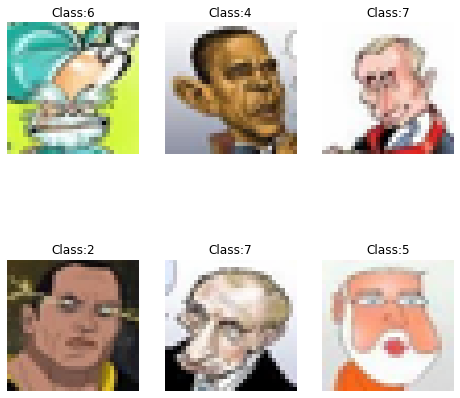

In [50]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [51]:
# write function
def find_eigen_val_vec(mat):
  eigen_values,eigen_vectors=np.linalg.eigh(mat)
  # Sort the Eigen values and vectors according to descending order of Eigen values
  descending_index=np.argsort(eigen_values)[::-1]
  eigen_values=eigen_values[descending_index]
  eigen_vectors=eigen_vectors[:,descending_index]
  return eigen_values,eigen_vectors

In [52]:
X.shape

(672, 32, 32, 3)

In [53]:
#Flatten the images
X_flattened = X.reshape((X.shape[0], X.shape[1]*X.shape[2]*X.shape[3]))

In [54]:
#Find covariance matrix
covariance_matrix=np.cov(X_flattened ,rowvar = False)

#### Compute eigen values and plot eigen value spectrum

In [ ]:
# eigen values and spectrum

In [55]:
#Find Eigen Values and Eigen Vectors
eigen_values,eigen_vectors=find_eigen_val_vec(covariance_matrix)

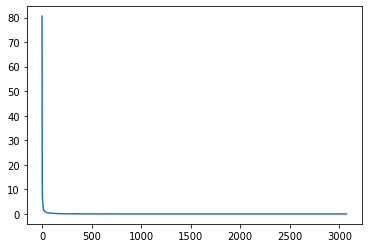

In [56]:
plt.plot(eigen_values)
plt.show()

In [57]:
# Find the Number of Principle Components (Cum_variance>=90)
def find_princ_components(eigen_vals,threshold=0.9):
  no_of_princ_components=1
  cum_var=0
  for eig_val in eigen_vals:
    var=eig_val/sum(eigen_vals)
    cum_var+=var
    if(cum_var>=threshold):
      break
    no_of_princ_components+=1
  return no_of_princ_components

In [58]:
no_of_princ_components = find_princ_components(eigen_values)

In [59]:
no_of_princ_components

115

#### Plot the percentage of variances vs the number of principal components

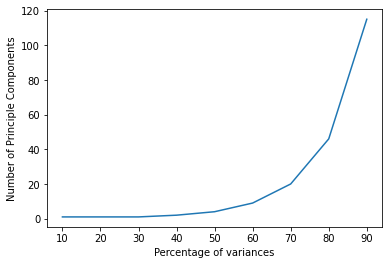

In [15]:
# plot variance vs components
x_cord=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y_cord=[]
for i in x_cord:
  y_cord.append(find_princ_components(eigen_values,i))
# print(y_cord)
x_cord= [x*100 for x in x_cord]
plt.plot(x_cord,y_cord)
plt.xlabel('Percentage of variances')
plt.ylabel('Number of Principle Components')
plt.show()

#### Visualize eigen faces(eigen vectors)

In [60]:
eigen_faces=eigen_vectors[:,:no_of_princ_components]

In [61]:
images_reduced = np.dot(eigen_faces.transpose() , X_flattened.transpose()).transpose()
images_reduced.shape

(672, 115)

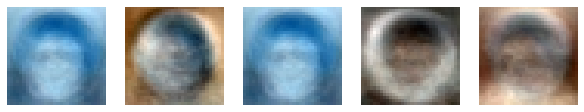

In [28]:

# Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eigen_faces,H,W,C, indices)


 ## Comment on what these ghost faces represent?
 - Eigen faces represent the first most principle faces out of all 3072 features of the dataset.
 - Since only a subset of eigen faces are cosn
 - Any face in the dataset can be reconstructed using these eigen faces.
 - The greater the amount of eigen faces are considered, the better the accuracy.

#### Reconstruction 

In [19]:
# reconstruction
def reconstruct(reduced_img ):
  im = np.matmul(eigen_faces,reduced_img)
  print(im.shape)
  im=im.real
  plt.imshow(im.reshape(32,32,3))
  plt.axis('off')

In [20]:
def compare_imgs(reduced_imgs,original_imgs):
  fig=plt.figure(figsize=(8, 8))
  col=2
  row=len(reduced_imgs)
  for i in range(1, row +1):
      img = reduced_imgs[i-1]
      fig.add_subplot(row, col, 2*i-1)
      img = np.matmul(eigen_faces,img)
      if opt['is_grayscale']:
          plt.imshow(img , cmap='gray') 
      else:
          plt.imshow(img.reshape(32,32,3))
      plt.title("Reconstructed Image")
      plt.axis('off') 

      img = original_imgs[i-1]
      fig.add_subplot(row, col, 2*i)
      
      if opt['is_grayscale']:
          plt.imshow(img , cmap='gray') 
      else:
          plt.imshow(img)
      plt.title("Original Image")
      plt.axis('off')   
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3072,)


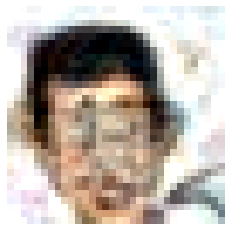

In [21]:
reconstruct(images_reduced[6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


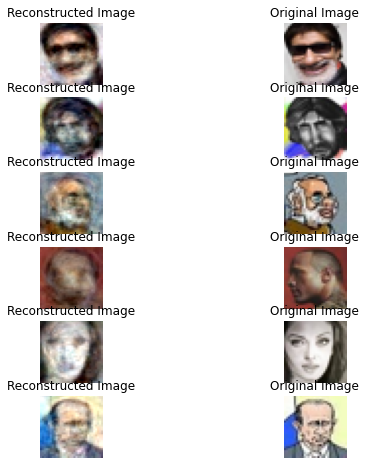

In [32]:
ind = np.random.randint(0,y.shape[0],6)
compare_imgs(images_reduced[ind],X[ind])

# Frobenius norm

In [77]:
number_of_componenents=[8,16,32,64,128]
frobenius=[]
for n in number_of_componenents:
  eigen_vecs_temp=eigen_vectors[:,:n]
  images_reduced_temp = np.dot(eigen_vecs_temp.transpose() , X_flattened.transpose()).transpose()
  a=np.matmul(images_reduced_temp,eigen_vecs_temp.T)
  dist_AB = np.linalg.norm(a - X_flattened, 'fro')
  frobenius.append(dist_AB)
  print(dist_AB)

277.9043611792508
241.44417606977956
205.5571805964817
166.52630241774162
124.04694435203791


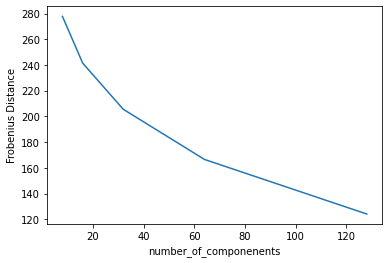

In [79]:
plt.plot(number_of_componenents,frobenius)
plt.xlabel('number_of_componenents')
plt.ylabel('Frobenius Distance')
plt.show()

#### Plot data in 2D

In [33]:
# plot data in 2D
X,y = load_data(dirpath)
#Flatten the images
X_flattened = X.reshape((X.shape[0], X.shape[1]*X.shape[2]*X.shape[3]))
#Find covariance matrix
covariance_matrix=np.cov(X_flattened ,rowvar = False)
#Find Eigen Values and Eigen Vectors
eigen_values,eigen_vectors=find_eigen_val_vec(covariance_matrix)
eigen_faces=eigen_vectors[:,:2]
images_reduced = np.dot(eigen_faces.transpose() , X_flattened.transpose()).transpose()
images_reduced.shape

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


(672, 2)

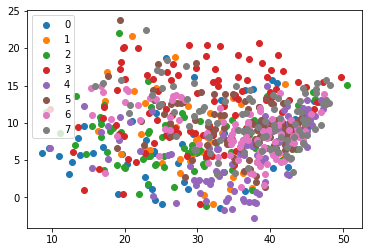

In [34]:

#Getting unique labels
u_labels = np.unique(y)

#plotting the results:

for i in u_labels:
    plt.scatter(images_reduced[y == i , 0] , images_reduced[y == i , 1] , label = i)
plt.legend()
plt.show()

## Observation Analysis
- The most important information is stored in first few componenents.
- The first two vectors are dominating factors in deciding the class of images.
- The images(data points) are nearer because similar images will have similar important features.


## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [39]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

class 0 Dominant face


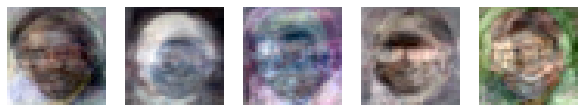

class 1 Dominant face


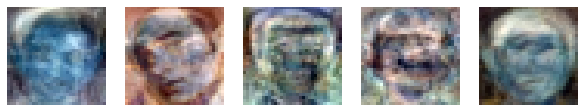

class 2 Dominant face


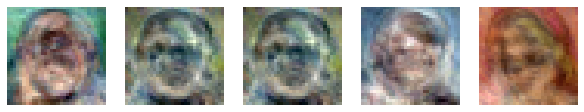

class 3 Dominant face


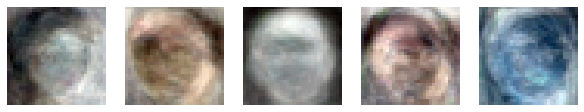

class 4 Dominant face


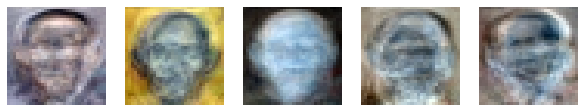

class 5 Dominant face


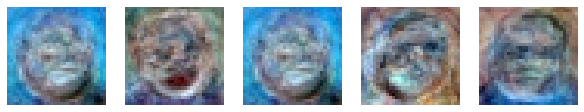

class 6 Dominant face


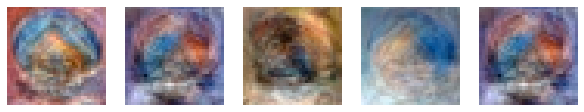

class 7 Dominant face


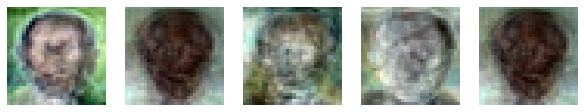

In [43]:
# visualize
princ_comp_dict={}
for k,v in cfw_dict.items():
  ind=np.where(y==v)[0]
  x_temp=X[ind,:]
  x_temp_flattened = x_temp.reshape((x_temp.shape[0], x_temp.shape[1]*x_temp.shape[2]*x_temp.shape[3]))
  # print(x_temp_flattened.shape)
  cov_mat = np.cov(x_temp_flattened ,rowvar = False)
  eigen_values,eigen_vectors=find_eigen_val_vec(cov_mat)
  princ_comp_dict[v]=find_princ_components(eigen_values)
  eigen_vectors=eigen_vectors[:,:princ_comp_dict[v]]
  indices = [randrange(12)+1 for i in range(5)]
  print("class",v,"Dominant face")
  plot(eigen_vectors,H,W,C, indices)

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [44]:
# components required
print("Number of principal components required for 90% reconstruction of the:")
print("Entire Dataset =",no_of_princ_components)
for k,v in cfw_dict.items():
  
  print(k,"=",princ_comp_dict[v])

Number of principal components required for 90% reconstruction of the:
Entire Dataset = 115
Amitabhbachan = 21
AamirKhan = 24
DwayneJohnson = 28
AishwaryaRai = 36
BarackObama = 43
NarendraModi = 57
ManmohanSingh = 50
VladimirPutin = 44


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

No, the number of componenents for entire dataset and each of class are different.

**Reason**
- The number of principle components depends on preserving the variance.
Here the threshold variance is 90%
- Since the images belonging to a single class have most features common, the higher amount of variance will be stored in less number of components.
- Therefore the number of principle components for a single class are less when compared to entire dataset.

In [ ]:
# observation/analysis

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [45]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [46]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:

regr = LinearRegression()
regr.fit(X,label)
print(regr.score(X, label))

1.0


In [48]:
# code here
scores=[]
components=[i for i in range(1,201)]
for com in components:
  pca = PCA(n_components = com)
  mat=pca.fit_transform(X)
  regr = LinearRegression()
  regr.fit(mat,label)
  scores.append(regr.score(mat, label))

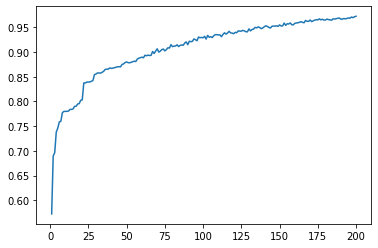

In [ ]:
plt.plot(components,scores)

In [ ]:
# analysis / plot (split the cells if required)

## Inference
- There is an exponential increase in Linear regression for the 75 components.
- There is Linear increase in score from 75 to 175 number of components.
- The score had no drastic change(almost 95 to 98) when components are increased above 175